In [1]:
import numpy as np
import pandas as pd
import glob
import time
import pandas as pd
# from xml.dom import minidom
import os
import matplotlib.pyplot as plt
import keras


Using TensorFlow backend.


In [2]:
df=pd.read_csv('./dataset/XSS_dataset.csv',encoding='utf-8-sig')
df.head()


,Unnamed: 0,Sentence,Label
0,0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,2,"\t </span> <span class=""reference-text"">Steeri...",0
3,3,"\t </span> <span class=""reference-text""><cite ...",0
4,4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


In [3]:
df=df[df.columns[-2:]]
df.head()

,Sentence,Label
0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,"\t </span> <span class=""reference-text"">Steeri...",0
3,"\t </span> <span class=""reference-text""><cite ...",0
4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


In [4]:
sentences=df['Sentence'].values
sentences[0]

'<li><a href="/wiki/File:Socrates.png" class="image"><img alt="Socrates.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Socrates.png/18px-Socrates.png" decoding="async" width="18" height="28" class="noviewer" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Socrates.png/27px-Socrates.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Socrates.png/36px-Socrates.png 2x" data-file-width="326" data-file-height="500" /> </a> <a href="/wiki/Portal:Philosophy" title="Portal:Philosophy">Philosophy&#32;portal </a> </li> </ul>'

In [5]:
df.shape[0]

13686

In [6]:
def convert_to_ascii(sentence):
    sentence_ascii=[]

    for i in sentence:
        """Some characters have values very big e.d 8221 adn some are chinese letters
        I am removing letters having values greater than 8222 and for rest greater 
        than 128 and smaller than 8222 assigning them values so they can easily be normalized"""
       
        if(ord(i)<8222):      # ” has ASCII of 8221
            
            if(ord(i)==8217): # ’  :  8217
                sentence_ascii.append(134)
            
            
            if(ord(i)==8221): # ”  :  8221
                sentence_ascii.append(129)
                
            if(ord(i)==8220): # “  :  8220
                sentence_ascii.append(130)
                
                
            if(ord(i)==8216): # ‘  :  8216
                sentence_ascii.append(131)
                
            if(ord(i)==8217): # ’  :  8217
                sentence_ascii.append(132)
            
            if(ord(i)==8211): # –  :  8211
                sentence_ascii.append(133)
                
                
            """
            If values less than 128 store them else discard them
            """
            if (ord(i)<=128):
                    sentence_ascii.append(ord(i))
    
            else:
                    pass
            

    zer=np.zeros((10000))

    for i in range(len(sentence_ascii)):
        zer[i]=sentence_ascii[i]

    zer.shape=(100, 100)


#     plt.plot(image)
#     plt.show()
    return zer

In [15]:
sentences[1]
#convert_to_ascii(sentences[1])

'<tt onmouseover="alert(1)">test</tt>'

In [21]:
convert_to_ascii(sentences[1])

array([ 60., 116., 116.,  32., 111., 110., 109., 111., 117., 115., 101.,
       111., 118., 101., 114.,  61.,  34.,  97., 108., 101., 114., 116.,
        40.,  49.,  41.,  34.,  62., 116., 101., 115., 116.,  60.,  47.,
       116., 116.,  62.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.])

In [18]:
convert_to_ascii(sentences[1]).shape

(100, 100)

In [28]:
import cv2
arr=np.zeros((len(sentences),100,100))

for i in range(len(sentences)):
    
    image=convert_to_ascii(sentences[i])
    x=np.asarray(image,dtype='float')
    image =  cv2.resize(x, dsize=(100,100), interpolation=cv2.INTER_CUBIC)
    image/=128

    
#     if i==1:
#         plt.plot(image)
#         plt.show()    
    arr[i]=image

In [29]:
print("Input data shape : ", arr.shape)

Input data shape :  (13686, 100, 100)


In [30]:
data = arr.reshape(arr.shape[0], 100, 100, 1)

In [31]:
y=df['Label'].values

In [32]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(data,y, test_size=0.2, random_state=42)

In [33]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten,Dropout,MaxPool2D, BatchNormalization

In [34]:
# A basic CNN Model
# Number of layers = 11
# Number of Convolutional layer: 3
model=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu, input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [35]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)            

In [36]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.97):
            print(" \n Reached 97% + validation accuracy")
            self.model.stop_training=True
callbacks = myCallback()

In [37]:
batch_size = 256
num_epoch = 10
#model training
model_log = model.fit(trainX, trainY,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=( testX,  testY)
#                        callbacks=[callbacks]
                     )

Train on 10948 samples, validate on 2738 samples
Epoch 1/10
10948/10948 [==============================] - 136s 12ms/sample - loss: 0.4739 - accuracy: 0.7731 - val_loss: 0.3925 - val_accuracy: 0.8141
Epoch 2/10
10948/10948 [==============================] - 140s 13ms/sample - loss: 0.3766 - accuracy: 0.8323 - val_loss: 0.3696 - val_accuracy: 0.8229
Epoch 3/10
10948/10948 [==============================] - 138s 13ms/sample - loss: 0.2044 - accuracy: 0.9235 - val_loss: 0.0927 - val_accuracy: 0.9726
Epoch 4/10
10948/10948 [==============================] - 137s 13ms/sample - loss: 0.0835 - accuracy: 0.9747 - val_loss: 0.0762 - val_accuracy: 0.9755
Epoch 5/10
10948/10948 [==============================] - 138s 13ms/sample - loss: 0.0704 - accuracy: 0.9799 - val_loss: 0.0610 - val_accuracy: 0.9803
Epoch 6/10
10948/10948 [==============================] - 140s 13ms/sample - loss: 0.0517 - accuracy: 0.9861 - val_loss: 0.0616 - val_accuracy: 0.9806
Epoch 7/10
10948/10948 [=====================

In [47]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(model_log.history[train_acc])
    plt.plot(model_log.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig("1.png")
    plt.show()

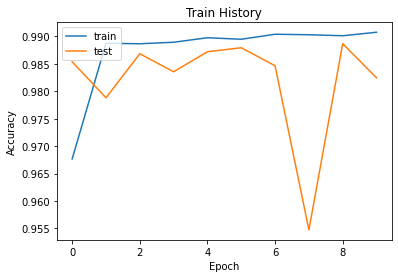

In [48]:
show_train_history('accuracy','val_accuracy')

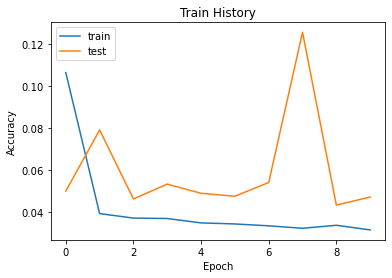

In [49]:
show_train_history('loss','val_loss')

In [38]:
pred=model.predict(testX)

In [39]:
for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=1
    elif pred[i]<=0.5:
        pred[i]=0

In [40]:
true=0
false=0

for i in range(len(pred)):
    if pred[i] == testY[i]:
        true+=1
    else:
        false+=1
        
print("correct predicted :: ", true)
print("false prediction :: ", false)

correct predicted ::  2705
false prediction ::  33


In [41]:
attack=0
benign=0
for i in range(len(testY)):
    if testY[i]==1:
        attack+=1
    else:
        benign+=1

print("Attack data in test set :: ", attack)
print(" Benign data in test set :: ", benign)

Attack data in test set ::  1478
 Benign data in test set ::  1260


In [43]:
model.compile(loss='binary_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)            

In [44]:
batch_size = 128
num_epoch = 10
#model training
model_log2 = model.fit(trainX, trainY,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=( testX,  testY)
#                        callbacks=[callbacks]
                     )

Train on 10948 samples, validate on 2738 samples
Epoch 1/10
10948/10948 [==============================] - 145s 13ms/sample - loss: 0.1063 - accuracy: 0.9677 - val_loss: 0.0498 - val_accuracy: 0.9854
Epoch 2/10
10948/10948 [==============================] - 147s 13ms/sample - loss: 0.0391 - accuracy: 0.9888 - val_loss: 0.0790 - val_accuracy: 0.9788
Epoch 3/10
10948/10948 [==============================] - 150s 14ms/sample - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0461 - val_accuracy: 0.9869
Epoch 4/10
10948/10948 [==============================] - 147s 13ms/sample - loss: 0.0368 - accuracy: 0.9889 - val_loss: 0.0532 - val_accuracy: 0.9836
Epoch 5/10
10948/10948 [==============================] - 149s 14ms/sample - loss: 0.0347 - accuracy: 0.9898 - val_loss: 0.0488 - val_accuracy: 0.9872
Epoch 6/10
10948/10948 [==============================] - 147s 13ms/sample - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0474 - val_accuracy: 0.9879
Epoch 7/10
10948/10948 [=====================

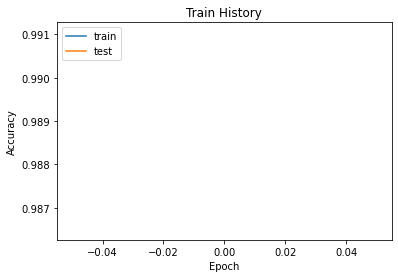

In [55]:
show_train_history('accuracy','val_accuracy')

- 提前结束

In [53]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(trainX, trainY,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=( testX,  testY),
          callbacks =[callbacks]
                     )

Train on 10948 samples, validate on 2738 samples
Epoch 1/10
10880/10948 [============================>.] - ETA: 0s - loss: 0.0304 - accuracy: 0.9910 
 Reached 97% + validation accuracy
10948/10948 [==============================] - 146s 13ms/sample - loss: 0.0302 - accuracy: 0.9910 - val_loss: 0.0422 - val_accuracy: 0.9865


In [56]:
model1=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu, input_shape=(100,100,1)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [57]:
model1.compile(loss='binary_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
dropout (Dropout)            (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 47, 47, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 47, 128)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 256)      

In [ ]:
batch_size = 128
num_epoch = 10
#model training
model1_log = model1.fit(trainX, trainY,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=( testX,  testY),
          #callbacks =[callbacks]
                     )

Train on 10948 samples, validate on 2738 samples
Epoch 1/10
10948/10948 [==============================] - 217s 20ms/sample - loss: 0.6862 - accuracy: 0.6013 - val_loss: 0.6857 - val_accuracy: 0.5657
Epoch 2/10
10948/10948 [==============================] - 218s 20ms/sample - loss: 0.6764 - accuracy: 0.6034 - val_loss: 0.6803 - val_accuracy: 0.5767
Epoch 3/10
10948/10948 [==============================] - 235s 21ms/sample - loss: 0.6634 - accuracy: 0.6113 - val_loss: 0.6713 - val_accuracy: 0.5931
Epoch 4/10
  512/10948 [>.............................] - ETA: 3:24 - loss: 0.6557 - accuracy: 0.6113